In [97]:
import matplotlib.pyplot as plt
import pandas as pd
from math import ceil

df_timeloop = pd.read_csv("timeloop_gemm_16k.csv")
df_timeloop_hint = pd.read_csv("timeloop_gemm_16k_hint.csv")
df_zigzag = pd.read_csv("zigzag_gemm_16k.csv")
df_zigzag_bypass_hint = pd.read_csv("zigzag_gemm_16k_no_llb.csv")
df_ffm = pd.read_csv("ffm_gemm_16k.csv")

DATAFRAMES = [df_timeloop, df_timeloop_hint, df_zigzag, df_zigzag_bypass_hint, df_ffm]

for df in DATAFRAMES:
    df["edp"] = df["energy"]*df["latency"]
    df["total_time"] = df["mapper_time"]

for df in [df_timeloop, df_timeloop_hint]:
    df["total_time"] = df["mapper_time"]*df["threads"]

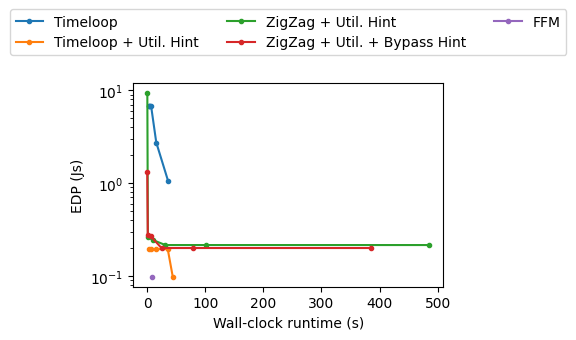

In [98]:
LABELS = ["EDP (Js)"]
COLUMNS = ["edp", "latency", "energy"]

num_axes = len(list(zip(LABELS, COLUMNS)))

MARKERS = ['.', '.', '.', '.', '.']
NAMES = ["Timeloop", "Timeloop + Util. Hint", "ZigZag + Util. Hint", "ZigZag + Util. + Bypass Hint", "FFM"]

fig, axes = plt.subplots(num_axes, 1, sharex=True, figsize=(4, 4*0.66*num_axes))
if isinstance(axes, plt.Axes):
    axes = [axes]

for i, (label, column) in enumerate(zip(LABELS, COLUMNS)):
    ax=axes[i]
    ax.set_ylabel(label)
    for df, marker, name in zip(DATAFRAMES, MARKERS, NAMES):
        df.plot(x="mapper_time", y=column, ax=ax, marker=marker, label=name)
    ax.set_yscale("log")
    if i > 0:
        ax.get_legend().remove()
    else:
        ax.legend(ncols=ceil(len(DATAFRAMES)/2), bbox_to_anchor=(0.5,1.4), loc="upper center")

ax.set_xlabel('Wall-clock runtime (s)')
fig.savefig("gemm_16k_clock_time.png", dpi=400, bbox_inches="tight")

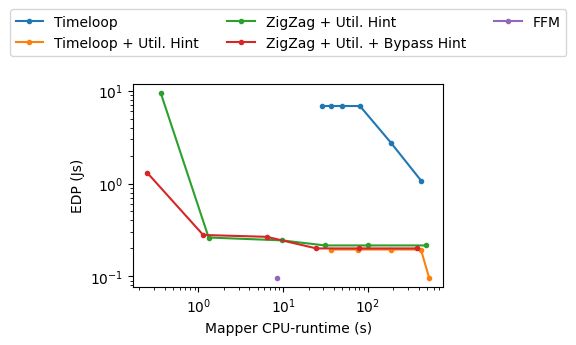

In [99]:
fig, axes = plt.subplots(num_axes, 1, sharex=True, figsize=(4, 4*0.66*num_axes))
if isinstance(axes, plt.Axes):
    axes = [axes]

for i, (label, column) in enumerate(zip(LABELS, COLUMNS)):
    ax=axes[i]
    ax.set_ylabel(label)
    for df, marker, name in zip(DATAFRAMES, MARKERS, NAMES):
        df.plot(x="total_time", y=column, ax=ax, marker=marker, label=name)
    ax.set_yscale("log")
    ax.set_xscale("log")
    if i > 0:
        ax.get_legend().remove()
    else:
        ax.legend(ncols=ceil(len(DATAFRAMES)/2), bbox_to_anchor=(0.5,1.4), loc="upper center")

ax.set_xlabel('Mapper CPU-runtime (s)')
fig.savefig("gemm_16k_cpu_time.png", dpi=400, bbox_inches="tight")